In [1]:
from autometrics.dataset.datasets.simplification import SimpDA
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.evaluate.correlation import calculate_correlation
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeProposer import LLMJudgeProposer
from autometrics.metrics.MetricBank import all_metrics
import dspy
import pandas as pd
pd.set_option('display.max_colwidth', None)

import litellm

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = SimpDA()

In [3]:
dataset.add_metrics(all_metrics)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 41/41 [01:03<00:00,  1.55s/it]


computing greedy matching.


100%|██████████| 68/68 [00:00<00:00, 177.75it/s]


done in 63.96 seconds, 67.85 sentences/sec


In [4]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.3, seed=42)

In [5]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [6]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3-70b-Instruct'

In [7]:
from autometrics.metrics.llm_judge.LLMJudgeExampleRubric import LLMJudgeExampleRubric

In [8]:
for target_column in dataset.target_columns:
    new_metric = LLMJudgeExampleRubric(
        name=target_column + "_" + llama31_70b.model.split('/')[-1], 
        description="Optimized Example Rubric LLM as a judge for " + target_column, 
        model=llama31_70b,
        train_dataset=train,
        task_description="Given a complicated original sentence, simplify it in a way such that a broader audience could easily understand it.",
        target_column=target_column,
        output_prompt_path='simpda_exrubriclong_' + target_column + '_prompt.dspy',
        metric_name=target_column,
        examples_per_range=5,
    )

    train.add_metrics([new_metric])
    dev.add_metrics([new_metric])
    test.add_metrics([new_metric])

Average Metric: 60.912728860488535 / 82  (74.3): 100%|██████████| 82/82 [00:34<00:00,  2.35it/s]


New best score: 74.28


Average Metric: 61.66438706710872 / 82  (75.2): 100%|██████████| 82/82 [00:42<00:00,  1.94it/s] 


New best score: 75.2


Average Metric: 61.846462266343394 / 82  (75.4): 100%|██████████| 82/82 [01:34<00:00,  1.15s/it]


New best score: 75.42


Grading rows:   0%|          | 0/82 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeExampleRubric.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] = score
Grading rows:   0%|          | 0/153 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeExampleRubric.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] =

New best score: 79.31


Average Metric: 67.18691812491232 / 82  (81.9): 100%|██████████| 82/82 [00:35<00:00,  2.28it/s] 


New best score: 81.94


Grading rows:   0%|          | 0/82 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeExampleRubric.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] = score
Grading rows:   0%|          | 0/153 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeExampleRubric.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] =

New best score: 66.48


Average Metric: 62.18715619194824 / 82  (75.8): 100%|██████████| 82/82 [00:37<00:00,  2.21it/s] 


New best score: 75.84


Average Metric: 62.733706498850886 / 82  (76.5): 100%|██████████| 82/82 [04:54<00:00,  3.60s/it]


New best score: 76.5


Average Metric: 64.4842642123068 / 82  (78.6): 100%|██████████| 82/82 [04:05<00:00,  2.99s/it]  


New best score: 78.64


Grading rows:   0%|          | 0/82 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeExampleRubric.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] = score
Grading rows:   0%|          | 0/153 [00:00<?, ?row/s]/Users/michaelryan/Documents/School/Stanford/Research/autometrics/autometrics/metrics/llm_judge/LLMJudgeExampleRubric.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.at[index, metric_name] =

In [9]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,BERTScoreP_roberta-large (0.5799887010646303),fluency_llama70b (0.6478816991993304),simplicity_llama70b (0.583904604622123),meaning_llama70b (0.5451713938343098),BERTScoreF_roberta-large (0.5376877382185893)
meaning,meaning_llama70b (0.8618962401507962),fluency_llama70b (0.8327418783668222),simplicity_llama70b (0.8177861880808476),BERTScoreF_roberta-large (0.7232674330257098),BERTScoreP_roberta-large (0.6106572417507335)
simplicity,simplicity_llama70b (0.6762611505486812),fluency_llama70b (0.6808209313991526),BERTScoreP_roberta-large (0.6150344373913592),meaning_llama70b (0.5661779994101618),BERTScoreF_roberta-large (0.5279062401502087)


In [10]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 3/3 [00:00<00:00, 21.94it/s]


In [11]:
train.get_metric_columns()

['BLEU',
 'CHRF',
 'TER',
 'GLEU',
 'SARI_P',
 'SARI_F',
 'BERTScoreP_roberta-large',
 'BERTScoreR_roberta-large',
 'BERTScoreF_roberta-large',
 'FKGL',
 'fluency_Meta-Llama-3-70b-Instruct',
 'meaning_Meta-Llama-3-70b-Instruct',
 'simplicity_Meta-Llama-3-70b-Instruct']

In [12]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 3/3 [00:00<00:00, 17.60it/s]


In [13]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,BERTScoreP_roberta-large (0.5799887010646303),Rg_fluency_llm (0.6419866917872751),Rg_simplicity_llm (0.6520125826148572),Rg_meaning_llm (0.6173270204534559),fluency_llama70b (0.6478816991993304)
meaning,Rg_meaning_llm (0.874015864936817),meaning_llama70b (0.8618962401507962),fluency_llama70b (0.8327418783668222),Rg_fluency_llm (0.8223012114745576),Rg_simplicity_llm (0.8013494751597485)
simplicity,Rg_fluency_llm (0.7215915644859532),Rg_simplicity_llm (0.7298388647171477),simplicity_llama70b (0.6762611505486812),Rg_meaning_llm (0.6713022199262781),fluency_llama70b (0.6808209313991526)


In [14]:
display_top_5_metrics_by_validation(test, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
fluency,Rg_simplicity_llm (0.6520125826148572),fluency_llama70b (0.6478816991993304),Rg_fluency_llm (0.6419866917872751),Rg_meaning_llm (0.6173270204534559),simplicity_llama70b (0.583904604622123)
meaning,Rg_meaning_llm (0.874015864936817),meaning_llama70b (0.8618962401507962),fluency_llama70b (0.8327418783668222),Rg_fluency_llm (0.8223012114745576),simplicity_llama70b (0.8177861880808476)
simplicity,Rg_simplicity_llm (0.7298388647171477),Rg_fluency_llm (0.7215915644859532),fluency_llama70b (0.6808209313991526),simplicity_llama70b (0.6762611505486812),Rg_meaning_llm (0.6713022199262781)


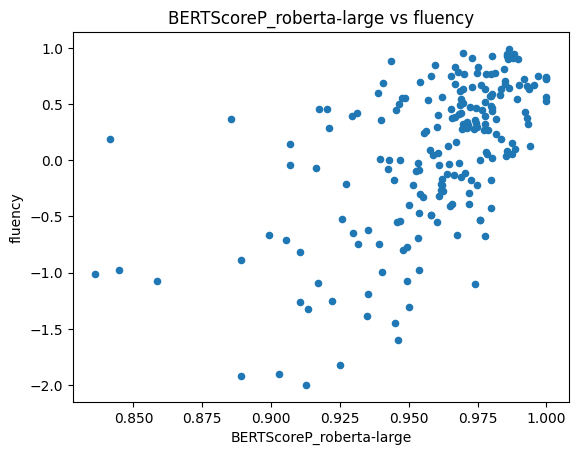

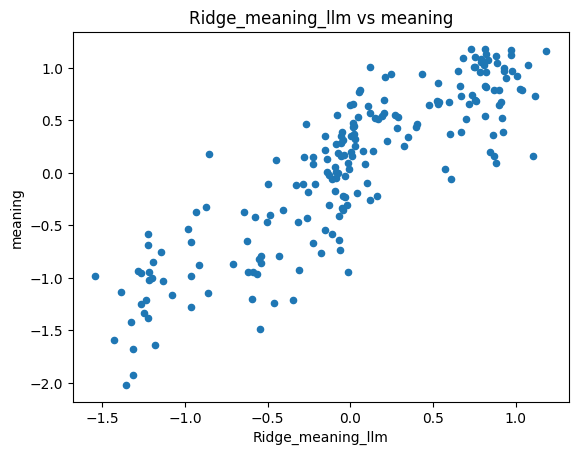

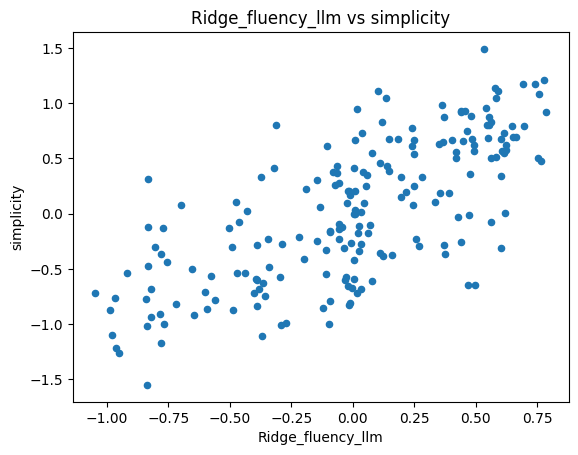

In [15]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
